# Linear Regression

In [6]:
import numpy as np
import tensorflow.compat.v1 as tf
from sklearn import datasets as ds
import matplotlib.pyplot as plt

## Boston House Prices Dataset
Data Set Characteristics:  
    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of UCI ML housing dataset.
http://archive.ics.uci.edu/ml/datasets/Housing

In [7]:
# Load Dataset
boston = ds.load_boston()
x_raw = boston.data[:,np.argwhere(boston.feature_names == 'RM')[0,0]]
y_raw = boston.target

/Users/toyamakengo/.pyenv/versions/3.10.6/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the C

<h2>Split dataset</h2>

In [9]:
total_count = x_raw.shape[0]

split = int(total_count * 0.6)

# Shuffle the data to avoid any ordering bias..
np.random.seed(0)
shuffle = np.random.permutation(total_count)

x = x_raw[shuffle]
y = y_raw[shuffle]

x_train_unnormalised = x[:split]
y_train_unnormalised = y[:split]

x_test_unnormalised = x[split:]
y_test_unnormalised = y[split:]

print('Training set size:', x_train_unnormalised.shape[0])
print('Test set size:', x_test_unnormalised.shape[0])

Training set size: 303
Test set size: 203


<h2>Visualisation</h2>

Text(0.5, 1.0, 'Plot of the Training Data')

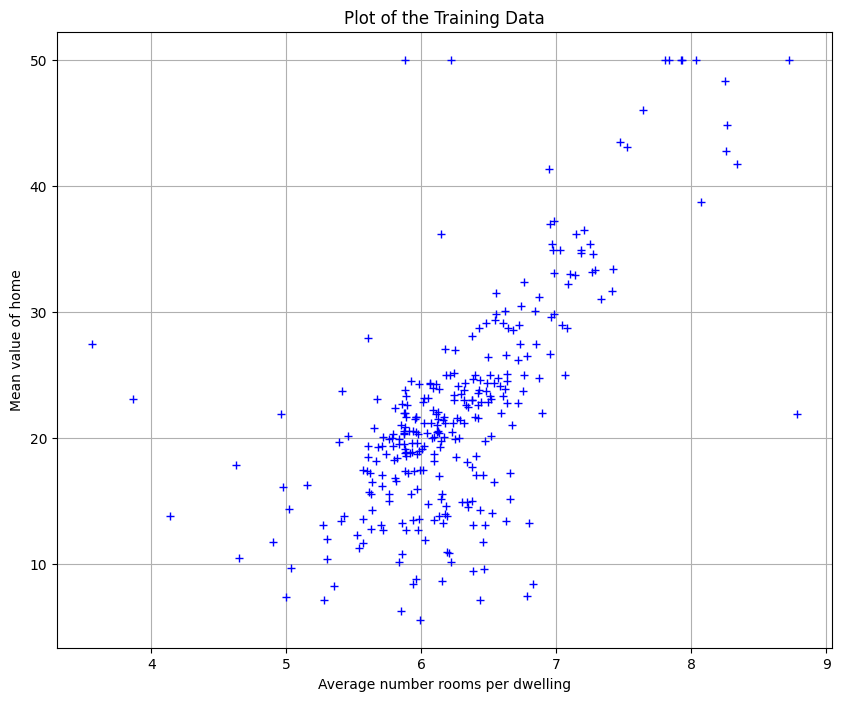

In [10]:
def plot_data(x, y):
    plt.figure(figsize=[10,8])
    plt.plot(x, y, 'b+')
    plt.grid(True)
    plt.xlabel('Average number rooms per dwelling')
    plt.ylabel('Mean value of home')

plot_data(x_train_unnormalised, y_train_unnormalised)
plt.title('Plot of the Training Data')

<h2>Normalisation</h2>

Passes checking function :)


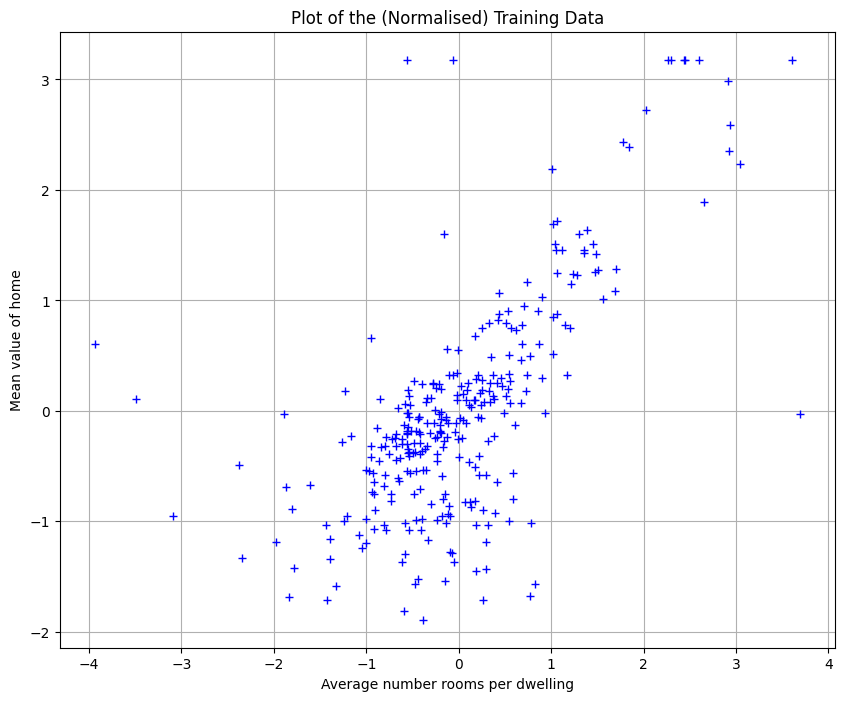

In [11]:
# Normalisation
def normalise_data(x_unnormalised):
    b = np.mean(x_unnormalised)
    a = np.std(x_unnormalised)
   
    x_normalised = (x_unnormalised -b ) / a

    return x_normalised, a, b

# Unnormalisation
def unnormalise_data(x_normalised, a, b):
    x_unnormalised = a*x_normalised +b 
    
    return x_unnormalised

try:
    x_train, x_norm_a, x_norm_b = normalise_data(x_train_unnormalised)
    y_train, y_norm_a, y_norm_b = normalise_data(y_train_unnormalised)

    x_test, _, _ = normalise_data(x_test_unnormalised)
    y_test, _, _ = normalise_data(y_test_unnormalised)
except Exception as err:
    print('Error during normalisation functions:', err)

# Check the functions above
def checking_function(normalise_data, unnormalise_data, data_to_check):
    passes_check = False
    
    est_normalised_data, est_a, est_b = normalise_data(data_to_check)
    est_unnormalised_data = unnormalise_data(est_normalised_data, est_a, est_b)
    
    passes_check = True if np.all(np.isclose(est_unnormalised_data, data_to_check)) else False
    
    return passes_check

try:
    if (checking_function(normalise_data, unnormalise_data, x_train_unnormalised) == True) and \
       (checking_function(normalise_data, unnormalise_data, y_train_unnormalised) == True):
        print('Passes checking function :)')
    else:
        print('Failed to pass the checking function :(')
except Exception as err:
    print('Error during checking function:', err)

# Plot the data to make sure they are normalised
try:
    plot_data(x_train, y_train)
    plt.title('Plot of the (Normalised) Training Data')
except Exception as err:
    print('Error during ploting functions:', err)

# Linear Regression Model

In linear regression we are trying to fit a linear model to the data of the form

\begin{align}
y &= w x + c
\end{align}

<h3> Square Error function</h3>

In [12]:
def least_squares_error(x, y, w, c):
    squared_error = np.sum((y - w*x -c)**2)
    
    return squared_error

try:
    print('Squared error for w = 1.5, c = 0.5 is ', 
          least_squares_error(x_train, y_train, w=1.5, c=0.5))
except Exception as err:
    print('Error during least squares calculation:', err)

Squared error for w = 1.5, c = 0.5 is  450.52041703162615


<h3>Analytic Solution</h3>

Analytic solution:
Analytic w =  0.6710446457297836
Analytic c =  1.2195548195136355e-15
Mean least squares error on TRAINING data =  0.5496990834373896
Mean least squares error on TEST data =  0.477446115537434


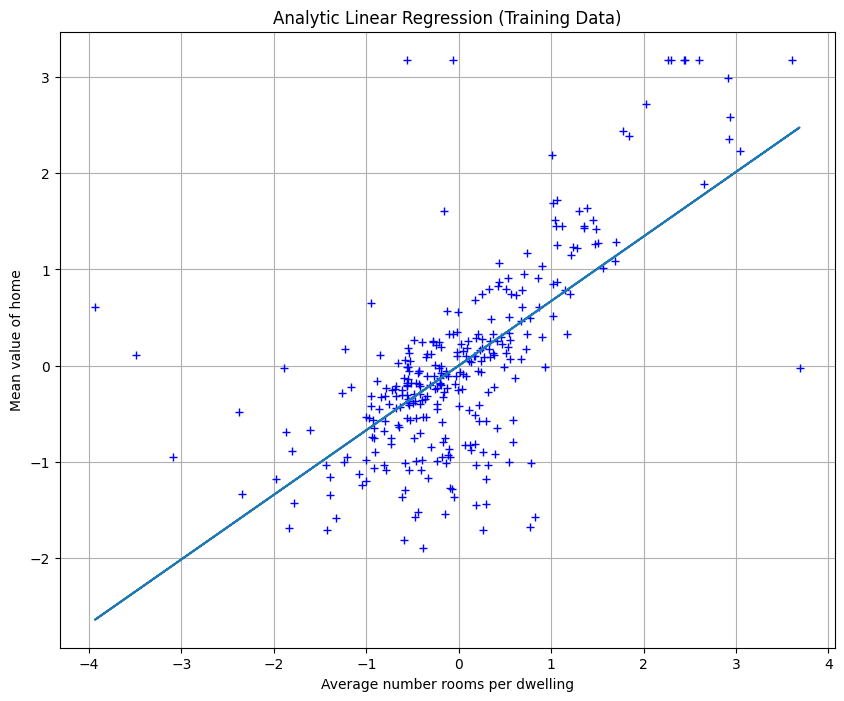

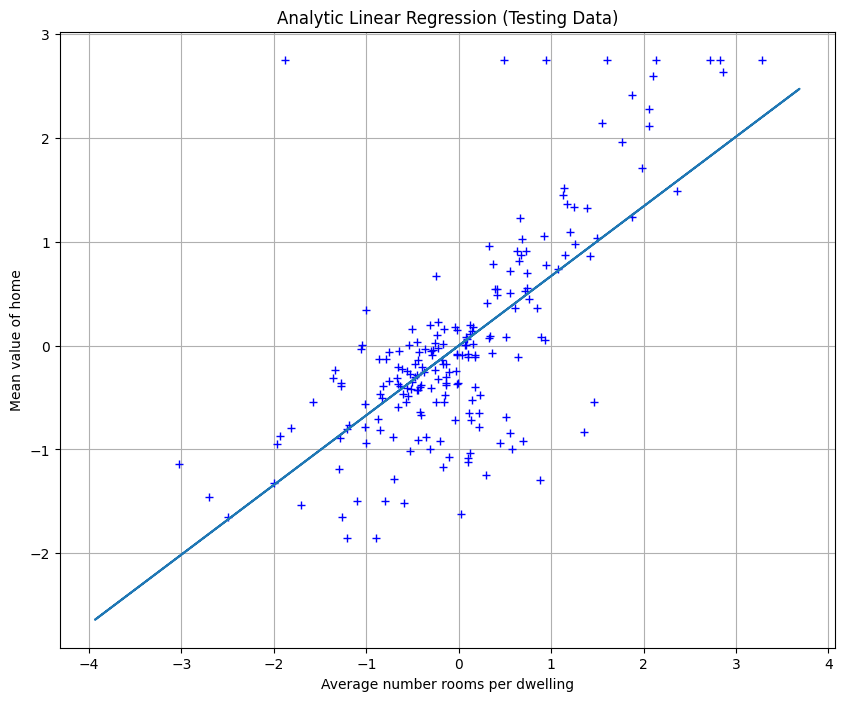

In [13]:
# A function to calcuate the optimal w and c
def least_squares_analytic_solution(x, y):
    A = np.sum(x**2)
    B = np.sum(x)
    C =np.sum(x*y)
    D = np.sum(y)
    N = len(x)
    w = (C*N-B*D)/(A*N-B**2)
    c = (B*C-A*D)/(B**2-A*N)
    
    return w, c

try:
    w_opt, c_opt = least_squares_analytic_solution(x_train, y_train)
    
    print('Analytic solution:')
    print('Analytic w = ', w_opt)
    print('Analytic c = ', c_opt)
    
except Exception as err:
    print('Error during least squares analytic solution:', err)

# Plot function
def plot_estimated_y_for_input_x(w, c):
    plt.plot(x_train, w*x_train+c)

try:
    plot_data(x_train, y_train)
    plt.title('Analytic Linear Regression (Training Data)')
    plot_estimated_y_for_input_x(w_opt, c_opt)
    
    print('Mean least squares error on TRAINING data = ',
          least_squares_error(x_train, y_train, w_opt, c_opt) / x_train.shape[0])

    plot_data(x_test, y_test)
    plt.title('Analytic Linear Regression (Testing Data)')
    plot_estimated_y_for_input_x(w_opt, c_opt)
    
    print('Mean least squares error on TEST data = ',
          least_squares_error(x_test, y_test, w_opt, c_opt) / x_test.shape[0])
    
except Exception as err:
    print('Error during plotting:', err)

<h3>Optimisation with Tensorflow</h3>

In [14]:
tf.reset_default_graph()

try:
    t_x_train = tf.constant(x_train, name='x_train')
    t_y_train = tf.constant(y_train, name='y_train')
except Exception as err:
    print('Error defining training data:', err)
    
# Initial values for optimisation
w_initial_guess = 1.5
c_initial_guess = 0.5

# Variables to hold w and c
t_w = tf.Variable(w_initial_guess, 
                  dtype=tf.float64, 
                  name='w')
t_c = tf.Variable(c_initial_guess, 
                  dtype=tf.float64, 
                  name='c')


# Least Square Error
def calculate_tf_least_squares_error(t_x_train, t_y_train, t_w, t_c):
    t_least_squares_error = tf.reduce_sum((t_y_train - t_w*t_x_train -t_c)**2)
    return t_least_squares_error


try:
    tensorflow_result = calculate_tf_least_squares_error(t_x_train, t_y_train, t_w, t_c)
except Exception as err:
    print('Error declaration of calculate_tf_least_squares_error():', err)
    
try:
    # Check with the result from your previous function
    numpy_result = least_squares_error(x_train, y_train, 
                                       w=w_initial_guess, 
                                       c=c_initial_guess)
    print('Tensorflow least squares error = ', tensorflow_result.numpy())
    print('numpy least squares error = ', numpy_result)    
    
    # This should pass if they are the same to nummerical precision!
    assert(np.isclose(tensorflow_result, numpy_result))
except Exception as err:
    print('Error during optimisation with calculate_tf_least_squares_error():', err)

Tensorflow least squares error =  450.52041703162615
numpy least squares error =  450.52041703162615


<h3>Gradients</h3>
Check that the gradients from tensorflow are correct by writing numpy code to calculate the value of the derivatives from the analytic 
expressions (derived previously):

\begin{align}
\frac{\partial E}{\partial w} 
    &= \sum_{i=0}^{N-1} 2 x_i (w x_i + c - y_i) \\
\end{align}

\begin{align}
\frac{\partial E}{\partial c} 
    &= \sum_{i=0}^{N-1} 2 (w x_i + c - y_i) \\
\end{align}

In [15]:
tf.reset_default_graph()

try:
    # Constants to hold the training data..
    t_x_train = tf.constant(x_train, name='x_train')
    t_y_train = tf.constant(y_train, name='y_train')
except Exception as err:
    print('Error defining training data:', err)
    
# Initial values for optimisation..
w_initial_guess = 1.5
c_initial_guess = 0.5

# Variables to hold w and c
t_w = tf.Variable(w_initial_guess, 
                  dtype=tf.float64, 
                  name='w')
t_c = tf.Variable(c_initial_guess, 
                  dtype=tf.float64, 
                  name='c')

try:
    with tf.GradientTape() as tape:
        loss = calculate_tf_least_squares_error(t_x_train, t_y_train, t_w, t_c)

    tf_grad_w,tf_grad_c = tape.gradient(loss, (t_w,t_c))

    print('Tensorflow gradient wrt w = ', tf_grad_w.numpy())
    print('Tensorflow gradient wrt c = ', tf_grad_c.numpy())
    
except Exception as err:
    print('Error using calculate_tf_least_squares_error() to find gradients:', err)
    

def calc_gradients_for_least_squares(x, y, w, c):
    grad_w = np.sum(2*x*(w*x+c-y))
    grad_c = np.sum(2*(w*x+c-y))
    
    return grad_w, grad_c

try:
    numpy_grad_w, numpy_grad_c = calc_gradients_for_least_squares(x_train, 
                                                                  y_train, 
                                                                  w_initial_guess, 
                                                                  c_initial_guess)

    print('Analytic gradient wrt w = ', numpy_grad_w)
    print('Analytic gradient wrt c = ', numpy_grad_c)

    # This should pass if they are the same to nummerical precision!
    assert(np.isclose(tf_grad_w, numpy_grad_w))
    assert(np.isclose(tf_grad_c, numpy_grad_c))
except Exception as err:
    print('Error during calculation with calc_gradients_for_least_squares():', err)

Tensorflow gradient wrt w =  502.3469446877508
Tensorflow gradient wrt c =  302.9999999999985
Analytic gradient wrt w =  502.34694468775075
Analytic gradient wrt c =  302.99999999999847


<h3>Gradient Descent in Tensorflow</h3>

In [16]:
tf.reset_default_graph()

try:
    # Constants to hold the training data
    t_x_train = tf.constant(x_train, name='x_train')
    t_y_train = tf.constant(y_train, name='y_train')
except Exception as err:
    print('Error defining training data:', err)
    
# Initial values for optimisation
w_initial_guess = 1.5
c_initial_guess = 0.5

# Variables to hold w and c
t_w = tf.Variable(w_initial_guess, 
                  dtype=tf.float64, 
                  name='w')
t_c = tf.Variable(c_initial_guess, 
                  dtype=tf.float64, 
                  name='c')

try:
    optimiser = tf.train.GradientDescentOptimizer(learning_rate=0.001) #0.001
    
    # Number of iterations to perform
    num_iterations = 40
   
    # Run a number of iterations of gradient descent..
    for iteration in range(num_iterations):
        
        with tf.GradientTape() as tape:
            # We want to minimise the least squares error
            loss = calculate_tf_least_squares_error(t_x_train, t_y_train, t_w, t_c)

        tf_grad_w,tf_grad_c = tape.gradient(loss, (t_w,t_c))
        # Create a gradient descent optimiser that uses a
        # certain step size (learning_rate)..

        optimiser.apply_gradients(zip((tf_grad_w,tf_grad_c),(t_w,t_c)))
    
        print('iter %4d, E(w,c) = %0.3f' % 
                  (iteration + 1, loss))

    # Get the final results of the optimisation..
    w_tf_opt = t_w.numpy()
    c_tf_opt = t_c.numpy()

    print('\nAfter tensorflow optimisation:')
    print('Tensorflow w = ', w_tf_opt)
    print('Tensorflow c = ', c_tf_opt)
    
    print('\nAnalytic solution:')
    print('Analytic w = ', w_opt)
    print('Analytic c = ', c_opt)
    
except Exception as err:
    print('Error using calculate_tf_least_squares_error():', err)

iter    1, E(w,c) = 450.520
iter    2, E(w,c) = 210.640
iter    3, E(w,c) = 173.402
iter    4, E(w,c) = 167.621
iter    5, E(w,c) = 166.724
iter    6, E(w,c) = 166.584
iter    7, E(w,c) = 166.563
iter    8, E(w,c) = 166.559
iter    9, E(w,c) = 166.559
iter   10, E(w,c) = 166.559
iter   11, E(w,c) = 166.559
iter   12, E(w,c) = 166.559
iter   13, E(w,c) = 166.559
iter   14, E(w,c) = 166.559
iter   15, E(w,c) = 166.559
iter   16, E(w,c) = 166.559
iter   17, E(w,c) = 166.559
iter   18, E(w,c) = 166.559
iter   19, E(w,c) = 166.559
iter   20, E(w,c) = 166.559
iter   21, E(w,c) = 166.559
iter   22, E(w,c) = 166.559
iter   23, E(w,c) = 166.559
iter   24, E(w,c) = 166.559
iter   25, E(w,c) = 166.559
iter   26, E(w,c) = 166.559
iter   27, E(w,c) = 166.559
iter   28, E(w,c) = 166.559
iter   29, E(w,c) = 166.559
iter   30, E(w,c) = 166.559
iter   31, E(w,c) = 166.559
iter   32, E(w,c) = 166.559
iter   33, E(w,c) = 166.559
iter   34, E(w,c) = 166.559
iter   35, E(w,c) = 166.559
iter   36, E(w,c) = 

<h3>Gradient Descent Optimisation</h3>

In [17]:
# Parameters...
num_iterations = 200 #20
converge_threshold = 1e-8

# State
w_current = w_initial_guess
c_current = c_initial_guess

try:
    # Keep track of the error
    E_current = least_squares_error(x_train, y_train, w_current, c_current)
except Exception as err:
    print('Error defining training data:', err)

current_step_size = 0.1



def run_iteration(x_train, y_train, w_current, c_current, E_current, 
                  current_step_size, converge_threshold):
    # Set to True when converged..
    converged = False

    #  Gradients
    grad_w, grad_c = calc_gradients_for_least_squares(x_train, y_train, w_current, c_current)

    # Code to take a step in the direction of the negative gradient proportional to the step size
    w_new = w_current - grad_w*current_step_size
    c_new = c_current - grad_c*current_step_size

    # Code to evaluate and remember the squared error
    E_new = least_squares_error(x_train, y_train, w_new, c_new)
    
    # Code to check that error is decreasing and reduce step size if not..
    while E_new > E_current:
        current_step_size = current_step_size / 2
        w_new = w_current - grad_w*current_step_size
        c_new = c_current - grad_c*current_step_size
        E_new = least_squares_error(x_train, y_train, w_new, c_new)

    # Convergence and terminate the loop if converged
    if np.abs(grad_w) < converge_threshold:
        converged = True
            
    # Take the step...
    w_current = w_new
    c_current = c_new
    E_current = E_new

    return w_current, c_current, E_current, current_step_size, converged

try:
    for iteration in range(num_iterations):
        w_current, c_current, E_current, current_step_size, converged = \
            run_iteration(x_train, y_train, w_current, c_current, E_current, 
                          current_step_size, converge_threshold)
        
        print('iteration %4d, E = %f, w = %f, c = %f' % 
              (iteration, E_current, w_current, c_current))
        
        if converged:
            # Break out of iteration loop
            print('Converged!')
            break
        
    print('\nAfter gradient descent optimisation:')
    print('Optimised w = ', w_current)
    print('Optimised c = ', c_current)

    print('\nAnalytic solution:')
    print('Analytic w = ', w_opt)
    print('Analytic c = ', c_opt)
    
except Exception as err:
        print('Error during run_iteration():', err)

iteration    0, E = 393.384238, w = -0.069834, c = -0.446875
iteration    1, E = 347.744484, w = 1.333205, c = 0.399395
iteration    2, E = 311.287947, w = 0.079239, c = -0.356959
iteration    3, E = 282.166864, w = 1.199971, c = 0.319032
iteration    4, E = 258.905262, w = 0.198317, c = -0.285135
iteration    5, E = 240.324148, w = 1.093545, c = 0.254839
iteration    6, E = 225.481758, w = 0.293435, c = -0.227763
iteration    7, E = 213.625819, w = 1.008534, c = 0.203563
iteration    8, E = 204.155424, w = 0.369414, c = -0.181934
iteration    9, E = 196.590577, w = 0.940627, c = 0.162604
iteration   10, E = 190.547859, w = 0.430105, c = -0.145327
iteration   11, E = 185.721003, w = 0.886384, c = 0.129886
iteration   12, E = 181.865362, w = 0.478585, c = -0.116086
iteration   13, E = 178.785519, w = 0.843056, c = 0.103752
iteration   14, E = 176.325374, w = 0.517310, c = -0.092728
iteration   15, E = 174.360237, w = 0.808445, c = 0.082876
iteration   16, E = 172.790507, w = 0.548243, c